In [1]:
import numpy as np

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv(r"C:\Users\harsh\OneDrive\Desktop\Projects\perfumes.csv")

In [3]:
df

,Product,Category,Unit_Price,Units_Sold,Region,Month,Total_Sales
0,Lavender Bliss,Luxury,863,72,South,Feb,62136
1,Lavender Bliss,Budget,1416,32,West,Jan,45312
2,Lavender Bliss,Luxury,747,69,North,May,51543
3,Citrus Spark,Budget,1416,117,South,Apr,165672
4,Floral Kiss,Mid-Range,313,50,West,Mar,15650
...,...,...,...,...,...,...,...
95,Floral Kiss,Budget,949,123,West,May,116727
96,Ocean Fresh,Luxury,1272,125,East,Feb,159000
97,Woody Musk,Budget,1292,170,South,Mar,219640
98,Ocean Fresh,Luxury,885,70,East,Mar,61950


In [4]:
df.head()

,Product,Category,Unit_Price,Units_Sold,Region,Month,Total_Sales
0,Lavender Bliss,Luxury,863,72,South,Feb,62136
1,Lavender Bliss,Budget,1416,32,West,Jan,45312
2,Lavender Bliss,Luxury,747,69,North,May,51543
3,Citrus Spark,Budget,1416,117,South,Apr,165672
4,Floral Kiss,Mid-Range,313,50,West,Mar,15650


In [5]:
df.shape

(100, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Product      100 non-null    object
 1   Category     100 non-null    object
 2   Unit_Price   100 non-null    int64 
 3   Units_Sold   100 non-null    int64 
 4   Region       100 non-null    object
 5   Month        100 non-null    object
 6   Total_Sales  100 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 5.6+ KB


In [7]:
df.describe()

,Unit_Price,Units_Sold,Total_Sales
count,100.000000,100.000000,100.000000
mean,896.560000,107.790000,94638.880000
std,337.634592,57.658573,62623.502457
min,301.000000,10.000000,11930.000000
25%,657.500000,58.250000,45869.250000
50%,860.000000,107.000000,83583.500000
75%,1164.750000,162.250000,128444.250000
max,1495.000000,198.000000,257402.000000


In [8]:
df.isnull().sum()

Product        0
Category       0
Unit_Price     0
Units_Sold     0
Region         0
Month          0
Total_Sales    0
dtype: int64

In [9]:
top_products = df.groupby('Product')['Total_Sales'].sum().sort_values(ascending=False)
print(top_products)

Product
Citrus Spark      2538074
Ocean Fresh       2131636
Lavender Bliss    1937189
Floral Kiss       1443354
Woody Musk        1413635
Name: Total_Sales, dtype: int64


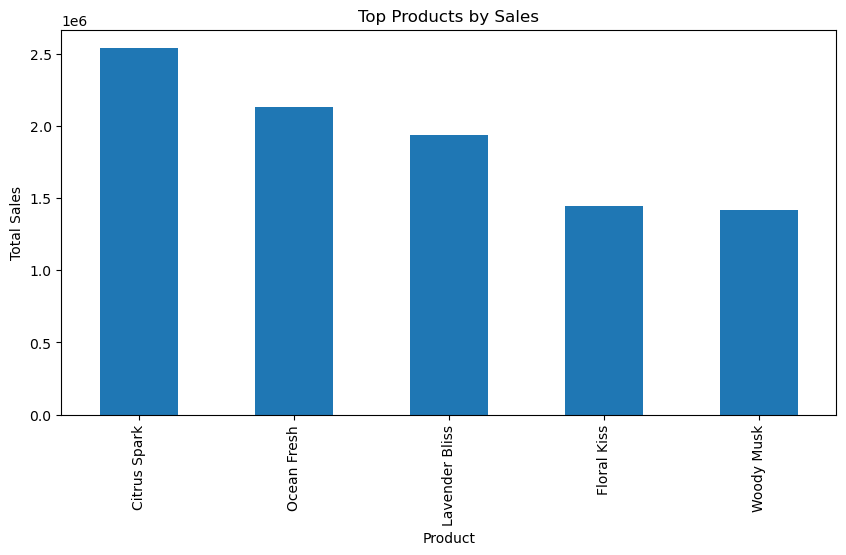

In [10]:
top_products.plot(kind='bar', title='Top Products by Sales', figsize=(10,5))
plt.ylabel('Total Sales')
plt.show()

Category
Budget       3397623
Luxury       3102330
Mid-Range    2963935
Name: Total_Sales, dtype: int64


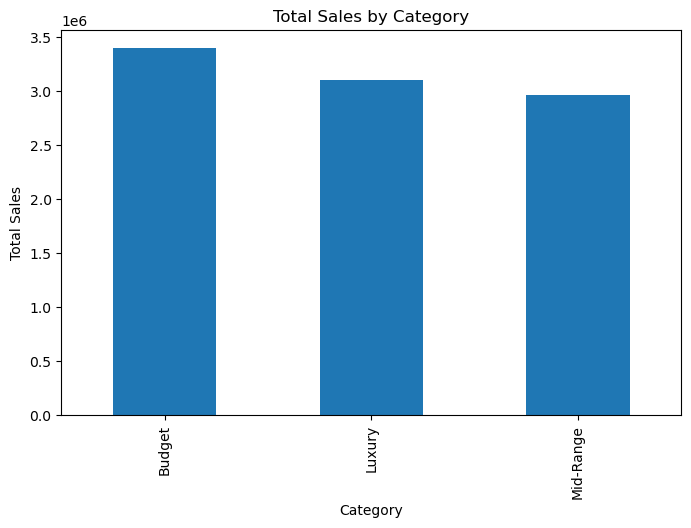

Region
East     3176398
West     2400161
North    2100334
South    1786995
Name: Total_Sales, dtype: int64


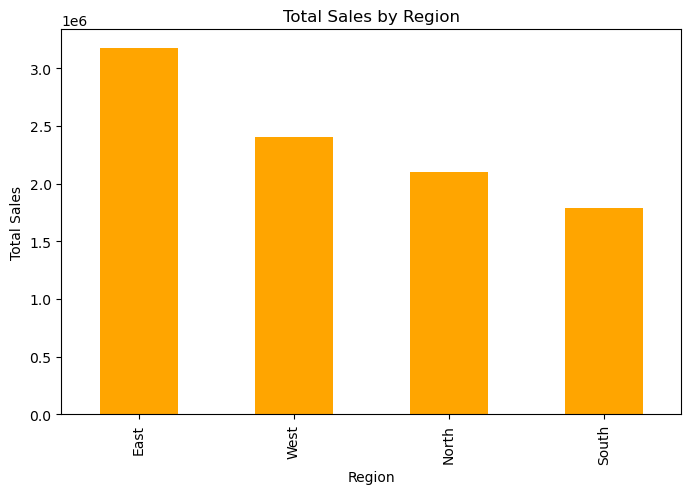

In [11]:
# Total Sales by Category
category_sales = df.groupby('Category')['Total_Sales'].sum().sort_values(ascending=False)
print(category_sales)

category_sales.plot(kind='bar', title='Total Sales by Category', figsize=(8,5))
plt.ylabel('Total Sales')
plt.show()

# Total Sales by Region
region_sales = df.groupby('Region')['Total_Sales'].sum().sort_values(ascending=False)
print(region_sales)

region_sales.plot(kind='bar', title='Total Sales by Region', figsize=(8,5), color='orange')
plt.ylabel('Total Sales')
plt.show()


Month
Feb    1930229
Jun    1910950
Apr    1532874
Jan    1513068
May    1462840
Mar    1113927
Name: Total_Sales, dtype: int64


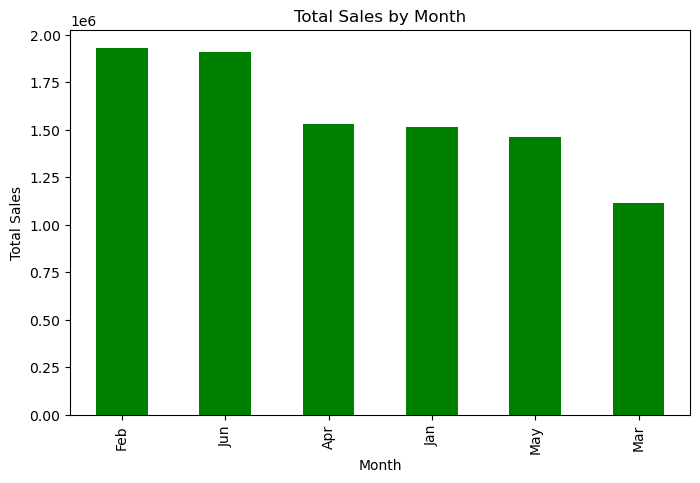

Month
Apr    114.166667
Jun    113.052632
May    110.647059
Feb    108.000000
Jan     99.533333
Mar     95.833333
Name: Units_Sold, dtype: float64


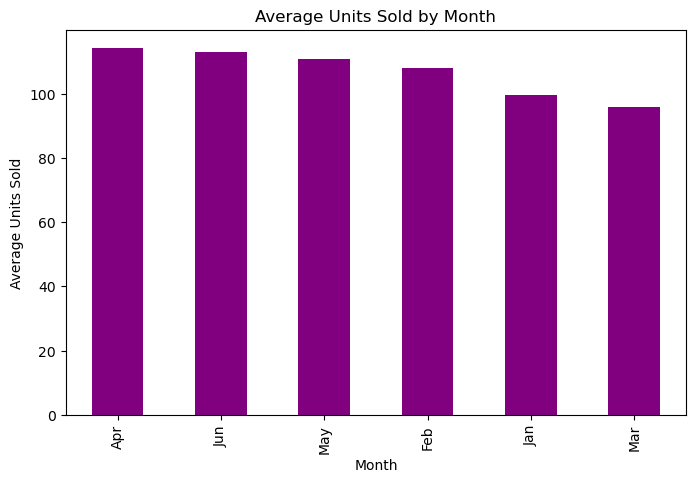

In [12]:
# Total Sales by Month
month_sales = df.groupby('Month')['Total_Sales'].sum().sort_values(ascending=False)
print(month_sales)

month_sales.plot(kind='bar', title='Total Sales by Month', figsize=(8,5), color='green')
plt.ylabel('Total Sales')
plt.show()

# Average Units Sold by Month
month_units = df.groupby('Month')['Units_Sold'].mean().sort_values(ascending=False)
print(month_units)

month_units.plot(kind='bar', title='Average Units Sold by Month', figsize=(8,5), color='purple')
plt.ylabel('Average Units Sold')
plt.show()


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error
import pandas as pd

# One-hot encode categorical features (Category, Product, Region, Month)
df_encoded = pd.get_dummies(df, columns=['Category', 'Product', 'Region', 'Month'], drop_first=True)

# Define features (X) and target (y)
X = df_encoded.drop('Total_Sales', axis=1)
y = df_encoded['Total_Sales']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
# Train model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predictions
y_pred = lr_model.predict(X_test)

# Evaluation
print("R² Score:", r2_score(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))


R² Score: 0.8956622215928284
Mean Absolute Error: 16731.540838525667


In [15]:
from sklearn.ensemble import RandomForestRegressor

# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluation
print("Random Forest R² Score:", r2_score(y_test, y_pred_rf))
print("Random Forest MAE:", mean_absolute_error(y_test, y_pred_rf))


Random Forest R² Score: 0.9129139597687815
Random Forest MAE: 16350.381


In [16]:
# Top 3 products by total sales
top_products = (
    df.groupby('Product')['Total_Sales']
    .sum()
    .sort_values(ascending=False)
    .head(3)
    .index.tolist()
)

for product in top_products:
    print(f"\n🔹 {product}")

    # Regional summary
    region_summary = (
        df[df['Product'] == product]
        .groupby('Region')[['Units_Sold', 'Total_Sales']]
        .sum()
        .sort_values('Total_Sales', ascending=False)
    )

    # Month summary
    month_summary = (
        df[df['Product'] == product]
        .groupby('Month')[['Units_Sold', 'Total_Sales']]
        .sum()
        .sort_values('Total_Sales', ascending=False)
    )

    print("📍 Region Summary")
    print(region_summary)
    print("\n📍 Month Summary")
    print(month_summary)



🔹 Citrus Spark
📍 Region Summary
        Units_Sold  Total_Sales
Region                         
West           697       737944
North          870       687342
East           752       579537
South          501       533251

📍 Month Summary
       Units_Sold  Total_Sales
Month                         
Jun           719       779015
Jan           384       390898
Apr           481       389731
Feb           423       375340
May           530       361217
Mar           283       241873

🔹 Ocean Fresh
📍 Region Summary
        Units_Sold  Total_Sales
Region                         
East           950       952880
West           661       747884
North          467       283476
South          173       147396

📍 Month Summary
       Units_Sold  Total_Sales
Month                         
Feb           505       616312
Jun           529       482093
Jan           463       332064
Apr           313       284452
May           294       270142
Mar           147       146573

🔹 Lavender Bliss
📍 R

In [17]:
from prophet import Prophet

# Optional: Focus on top N products
top_products = df.groupby('Product')['Total_Sales'].sum().sort_values(ascending=False).head(3).index.tolist()
df_top = df[df['Product'].isin(top_products)]


# Convert Month column to datetime for Prophet
month_order = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
df_top['Month'] = pd.Categorical(df_top['Month'], categories=month_order, ordered=True)
df_top['Month'] = pd.to_datetime(df_top['Month'].astype(str) + '-2025')  # replace 2025 with year


C:\Users\harsh\AppData\Local\Temp\ipykernel_28984\2803762527.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top['Month'] = pd.Categorical(df_top['Month'], categories=month_order, ordered=True)
C:\Users\harsh\AppData\Local\Temp\ipykernel_28984\2803762527.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_top['Month'] = pd.to_datetime(df_top['Month'].astype(str) + '-2025')  # replace 2025 with year
C:\Users\harsh\AppData\Local\Temp\ipykernel_28984\2803762527.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

In [18]:
import math

forecast_results = []

for product in top_products:
    product_data = df_top[df_top['Product'] == product]

    # Aggregate monthly
    monthly_df = (
        product_data.groupby(product_data['Month'].dt.to_period('M'))['Units_Sold']
        .sum()
        .reset_index()
    )
    monthly_df['Month'] = monthly_df['Month'].dt.to_timestamp()
    monthly_df.columns = ['ds', 'y']

    if len(monthly_df) < 4:
        continue

    model = Prophet()
    model.fit(monthly_df)

    future = model.make_future_dataframe(periods=1, freq='M')
    forecast = model.predict(future)
    pred = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(1)

    forecast_qty = max(0, pred['yhat'].values[0])
    lower = max(0, pred['yhat_lower'].values[0])
    upper = pred['yhat_upper'].values[0]
    suggested_restock = math.ceil(forecast_qty * 1)

    forecast_results.append({
        'Product': product,
        'Forecast Qty': round(forecast_qty),
        'Confidence Range': f"{int(lower)}–{int(upper)}",
        'Suggested Restock': suggested_restock
    })

results_df = pd.DataFrame(forecast_results)
print(results_df)

20:11:56 - cmdstanpy - INFO - Chain [1] start processing
20:11:56 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\harsh\anaconda3\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
20:11:56 - cmdstanpy - INFO - Chain [1] start processing
20:11:56 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\harsh\anaconda3\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
20:11:56 - cmdstanpy - INFO - Chain [1] start processing
20:11:56 - cmdstanpy - INFO - Chain [1] done processing


          Product  Forecast Qty Confidence Range  Suggested Restock
0    Citrus Spark           690          589–790                691
1     Ocean Fresh           367          193–528                367
2  Lavender Bliss           281          167–408                282


C:\Users\harsh\anaconda3\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
